# Titanic Dataset on Kaggle

In [180]:
#importing all needed modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

#setting visualization style and inline plots
%matplotlib inline
sns.set()

In [181]:
#importing the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# taking a look at the first 5 rows of the dataset
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
#taking a look at the overall data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [183]:
#summary statistics of numeric training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


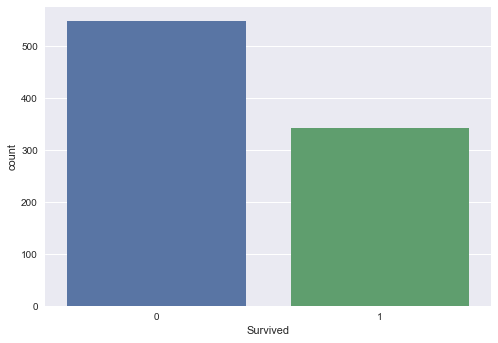

In [184]:
#plotting how many people survived from the training dataset
sns.countplot(x='Survived', data=train)

In [185]:
# creating a base model(bad model) that predicts that nobody survived
test['Survived'] = 0
test[['PassengerId','Survived']].to_csv('no_survived.csv', index=False)

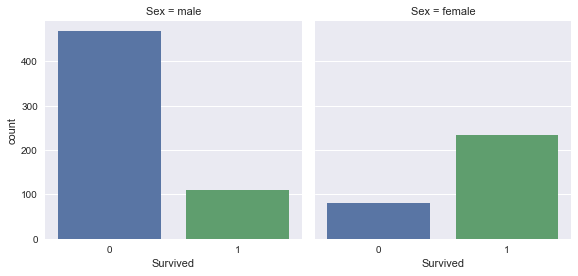

In [186]:
#Now that we have a benchmark, let's look at how features influence the output (finding relationships)
#looking at features of the dataset based on survival
sns.factorplot(x='Survived', col='Sex', kind='count', data=train)

We see that females were more likely to survive! 

In [187]:
#We see that females survived more than males
#To get numbers
print(train.groupby(['Sex']).Survived.sum())
#calculating proportions of survivors
print("\n Proportions: ")
print(train[train.Sex=='female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print(train[train.Sex=='male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

Sex
female    233
male      109
Name: Survived, dtype: int64

 Proportions: 
0.742038216561
0.188908145581


In [188]:
#predicting that all females survived and all males did not - still a BAD MODEL! :P
test['Survived'] = test.Sex =='female'
test['Survived'] = test.Survived.apply(lambda x: int(x))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [189]:
#printing this out to a csv
test[['PassengerId','Survived']].to_csv('no_survived.csv', index=False)

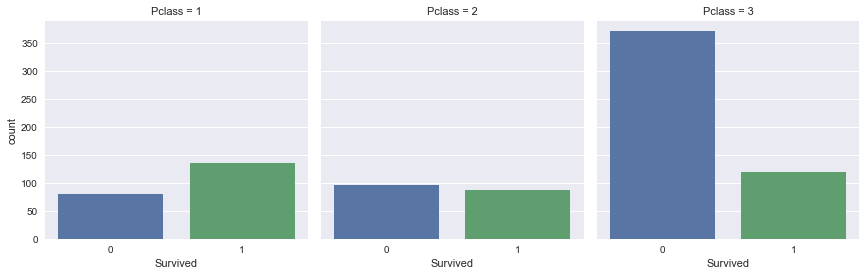

In [190]:
#Doing some exploratory data analysis now
sns.factorplot(x='Survived', col='Pclass',kind='count', data=train)

We see that people travelling first class were more likely to survive and those travelling third class were more likely not to survive.

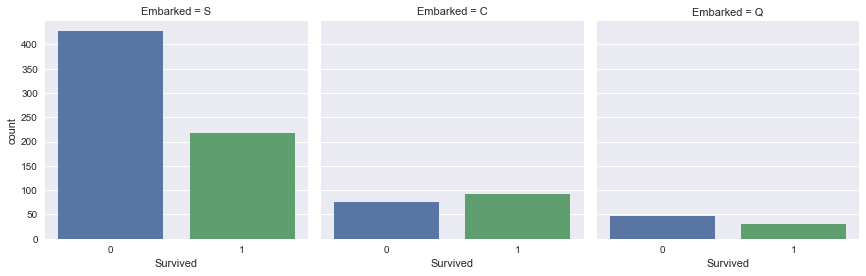

In [191]:
sns.factorplot(x='Survived', col='Embarked', kind='count',data=train)

People that embarked at Southampton were less likely to survive.

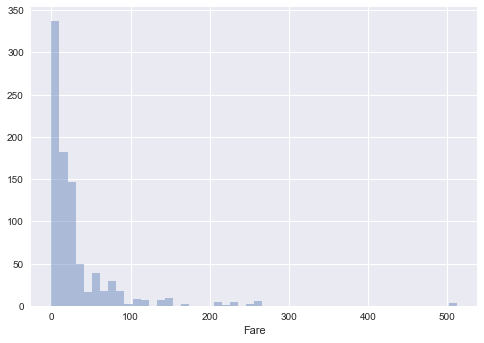

In [192]:
#plotting fare on histogram
sns.distplot(train.Fare,kde=False)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

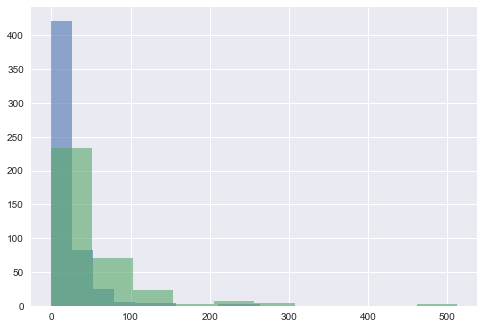

In [193]:
#we can see that a lot of people paid less than 100 to board the titanic
#plotting survival on fare
train.groupby('Survived').Fare.hist(alpha=0.6)

We can see that people who paid low fares were less likely to survive.

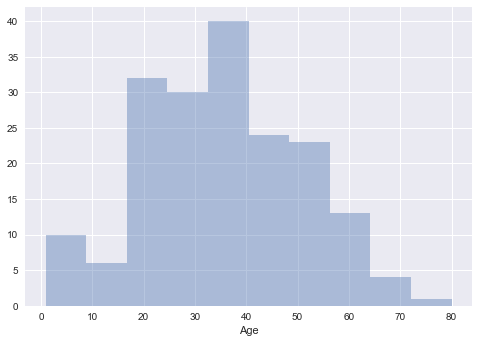

In [194]:
#Let us look at age now
#removing null/missing value rows from train
train_drop = train.dropna()
sns.distplot(train_drop.Age,kde=False)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

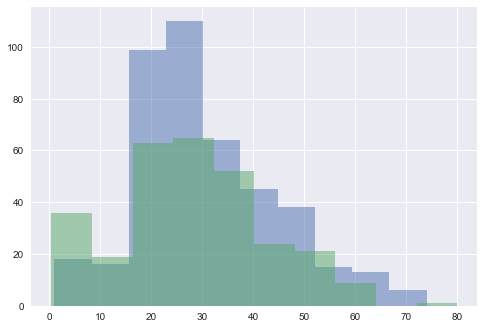

In [195]:
train.groupby('Survived').Age.hist(alpha=0.5)

This shows that passengers of low ages were more likely to survive.

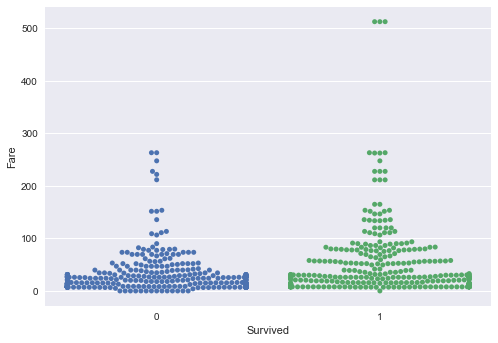

In [196]:
sns.swarmplot(x='Survived', y='Fare', data=train)

In [197]:
#Looking at Fare and Survival numbers
train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Looking at this we can see that people who paid higher fares were more likely to survive.

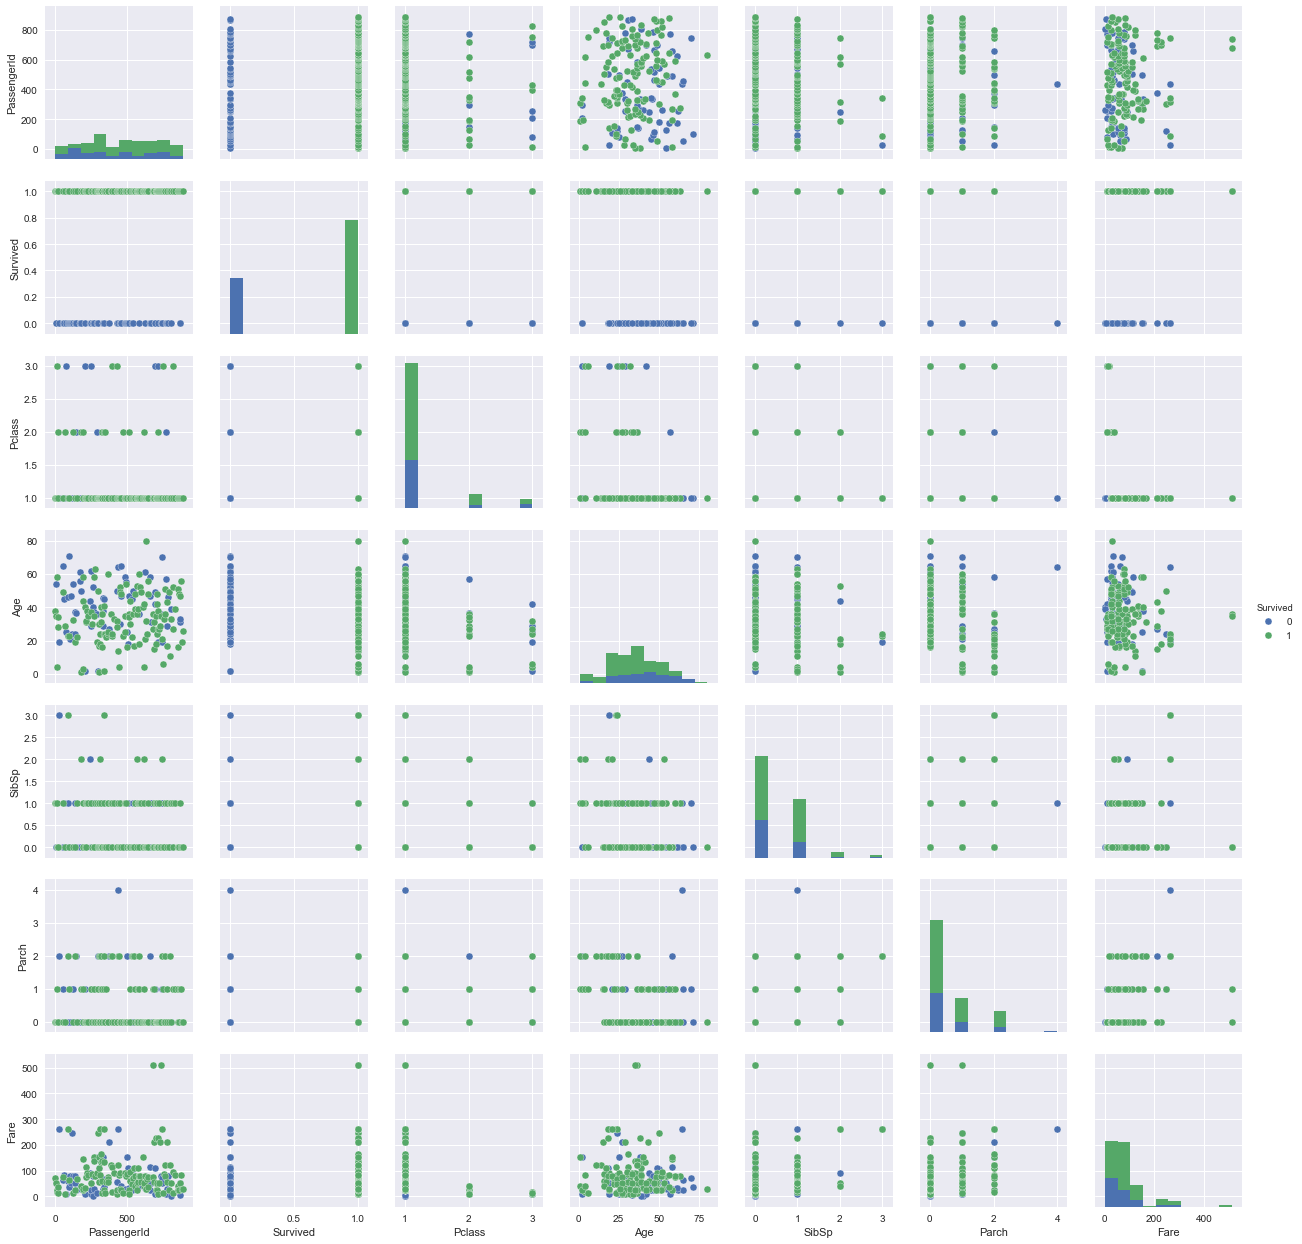

In [198]:
#Looking at all the features using pairplot
sns.pairplot(train_drop,hue='Survived')

In [199]:
#importing some new libraries
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [200]:
#removing the survived col into a separate var
survived = train.Survived
#combining train and test datasets
data = pd.concat([train.drop(['Survived'], axis=1),test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       418 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Looking at the info we can see that multiple features have missing values: Age, Cabin, Fare and Embarked

In [201]:
#Estimating missing data using median
data['Age'] = data.Age.fillna(data.Age.median())
#note that there is only one missing vlaue for 'Fare'
data['Fare'] = data.Fare.fillna(data.Fare.median())

#check this by checking info again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       418 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


We can see now that the Age and Fare features have no missing values.

In [202]:
#converting the Sex column to numeric encoding
data = pd.get_dummies(data, columns = ['Sex'], drop_first=True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,NaN,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,NaN,PC 17599,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,NaN,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,NaN,113803,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,NaN,373450,1


In [203]:
data = data[['Sex_male','Fare','Age','Pclass','SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex_male    1309 non-null uint8
Fare        1309 non-null float64
Age         1309 non-null float64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [205]:
#spliiting the data back into train and test sets
data_train = data[:891]
data_test = data[891:]

In [206]:
#converting dataframes to numpy arrays for sklearn
X = data_train.values
test_set = data_test.values
y = survived.values

In [207]:
#build decision-tree classifier
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [208]:
#predicting values for test_set
Y_pred = clf.predict(test_set)
#test.head()
test['Survived'] = Y_pred

#print this to csv
test[['PassengerId','Survived']].to_csv('no_survived.csv', index=False)

In [209]:
#checking for which depth gives max accuracy
#splitting train data intoe train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

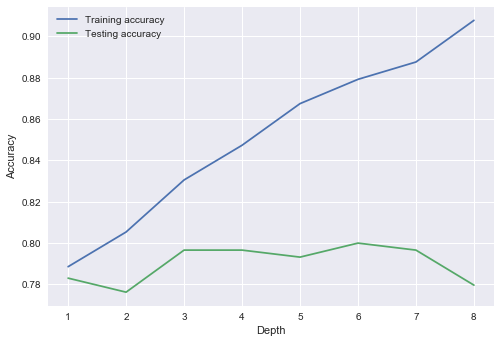

In [210]:
#running a loop through depth =0 to 9 and checking accuracy for each
depth = np.arange(1,9)
train_acc = np.empty(len(depth))
test_acc = np.empty(len(depth))

for i,k in enumerate(depth):
    #create decision tree with depth=k
    clf = tree.DecisionTreeClassifier(max_depth=k)
    
    # Fit to training data
    clf.fit(X_train, y_train)

    #Calculate the accuracy on the training set
    train_acc[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_acc[i] = clf.score(X_test, y_test)

plt.plot(depth,train_acc,label='Training accuracy')
plt.plot(depth, test_acc, label= 'Testing accuracy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')


Thus we can see here, that max_depth=3 gives the optimal decision tree; becasue a depth more than that although causes higher training accuracy results in overfitting.

In [211]:
#Let's try using the other features to predict
#removing the survived col into a separate var
survived = train.Survived
#combining train and test datasets
data = pd.concat([train.drop(['Survived'], axis=1),test])
#Estimating missing data using median
data['Age'] = data.Age.fillna(data.Age.median())
#note that there is only one missing vlaue for 'Fare'
data['Fare'] = data.Fare.fillna(data.Fare.median())
#converting the Sex column to numeric encoding
data = pd.get_dummies(data, columns = ['Sex'], drop_first=True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,NaN,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,NaN,PC 17599,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,NaN,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,NaN,113803,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,NaN,373450,1


In [212]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Sex_male
413,28.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,0,0.0,A.5. 3236,1
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,1.0,PC 17758,0
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,0.0,SOTON/O.Q. 3101262,1
416,28.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,0,0.0,359309,1
417,28.0,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,1,0.0,2668,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

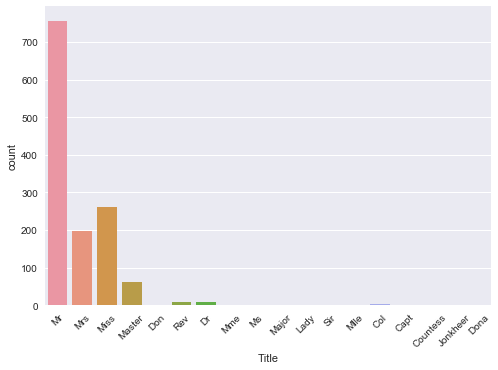

In [213]:
#We can see that the names have various titles - this could prossibly be related to survival - based on class in society
#extracting titles from names
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.',x).group(1))
sns.countplot('Title', data=data)
plt.xticks(rotation=45)

We can see that the most commonly used titles are the ones to the left on the plot.

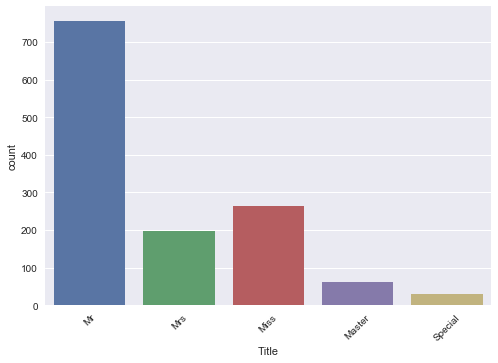

In [214]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [215]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Sex_male,Title
413,28.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,0,0.0,A.5. 3236,1,Mr
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,1.0,PC 17758,0,Special
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,0.0,SOTON/O.Q. 3101262,1,Mr
416,28.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,0,0.0,359309,1,Mr
417,28.0,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,1,0.0,2668,1,Master


In [216]:
#Since cabin has a large number of missing values - we can assume that maybe a large number of people did not have cabins at all
#creating a new column that encodes whether the passenger had a cabin or not
data['hasCabin'] = ~data.Cabin.isnull()
data.head()# Drop columns and view head

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Sex_male,Title,hasCabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,NaN,A/5 21171,1,Mr,False
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,NaN,PC 17599,0,Mrs,True
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,NaN,STON/O2. 3101282,0,Miss,False
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,NaN,113803,0,Mrs,True
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,NaN,373450,1,Mr,False


In [217]:
# Dropping unwanted columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head()

,Age,Embarked,Fare,Parch,Pclass,SibSp,Survived,Sex_male,Title,hasCabin
0,22.0,S,7.2500,0,3,1,NaN,1,Mr,False
1,38.0,C,71.2833,0,1,1,NaN,0,Mrs,True
2,26.0,S,7.9250,0,3,0,NaN,0,Miss,False
3,35.0,S,53.1000,0,1,1,NaN,0,Mrs,True
4,35.0,S,8.0500,0,3,0,NaN,1,Mr,False


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1309 non-null float64
Embarked    1307 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
Survived    418 non-null float64
Sex_male    1309 non-null uint8
Title       1309 non-null object
hasCabin    1309 non-null bool
dtypes: bool(1), float64(3), int64(3), object(2), uint8(1)
memory usage: 134.6+ KB


In [219]:
#estimating missing embarked values
print("Southampton: ")
print(data[data['Embarked'] == 'S'].shape[0])

print("Cherbourg: ")
print(data[data['Embarked'] == 'C'].shape[0])

print("Qweenstown: ")
print(data[data['Embarked'] == 'Q'].shape[0])

Southampton: 
914
Cherbourg: 
270
Qweenstown: 
123


In [220]:
#We can see that maximum passengers boarded at Southampton, so we can fill the missing vlaues with 'S'
data = data.fillna({'Embarked':'S'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
Survived    418 non-null float64
Sex_male    1309 non-null uint8
Title       1309 non-null object
hasCabin    1309 non-null bool
dtypes: bool(1), float64(3), int64(3), object(2), uint8(1)
memory usage: 94.6+ KB


In [221]:
#discretizing the age and fare features into bins
data['CatAge'] = pd.qcut(data.Age, q=4, labels=False )
data['CatFare']= pd.qcut(data.Fare, q=4, labels=False)
data.head()

,Age,Embarked,Fare,Parch,Pclass,SibSp,Survived,Sex_male,Title,hasCabin,CatAge,CatFare
0,22.0,S,7.2500,0,3,1,NaN,1,Mr,False,0,0
1,38.0,C,71.2833,0,1,1,NaN,0,Mrs,True,3,3
2,26.0,S,7.9250,0,3,0,NaN,0,Miss,False,1,1
3,35.0,S,53.1000,0,1,1,NaN,0,Mrs,True,2,3
4,35.0,S,8.0500,0,3,0,NaN,1,Mr,False,2,1


In [222]:
#Now we can drop age and fare
data = data.drop(['Age', 'Fare'], axis=1)
data.head()

,Embarked,Parch,Pclass,SibSp,Survived,Sex_male,Title,hasCabin,CatAge,CatFare
0,S,0,3,1,NaN,1,Mr,False,0,0
1,C,0,1,1,NaN,0,Mrs,True,3,3
2,S,0,3,0,NaN,0,Miss,False,1,1
3,S,0,1,1,NaN,0,Mrs,True,2,3
4,S,0,3,0,NaN,1,Mr,False,2,1


In [223]:
#Calculating the size of families into a new feature
data['Fam_size'] = data.Parch + data.SibSp
data.head()

,Embarked,Parch,Pclass,SibSp,Survived,Sex_male,Title,hasCabin,CatAge,CatFare,Fam_size
0,S,0,3,1,NaN,1,Mr,False,0,0,1
1,C,0,1,1,NaN,0,Mrs,True,3,3,1
2,S,0,3,0,NaN,0,Miss,False,1,1,0
3,S,0,1,1,NaN,0,Mrs,True,2,3,1
4,S,0,3,0,NaN,1,Mr,False,2,1,0


Survived
0.0    Axes(0.125,0.125;0.775x0.755)
1.0    Axes(0.125,0.125;0.775x0.755)
Name: Fam_size, dtype: object

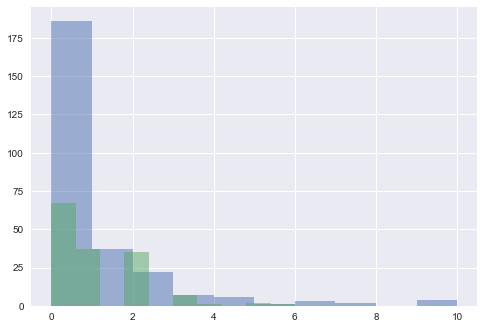

In [224]:
data.groupby('Survived').Fam_size.hist(alpha=0.5)

In [225]:
#converting into binary features
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Parch,Pclass,SibSp,Survived,Sex_male,hasCabin,CatAge,CatFare,Fam_size,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0,3,1,NaN,1,False,0,0,1,0,1,0,1,0,0
1,0,1,1,NaN,0,True,3,3,1,0,0,0,0,1,0
2,0,3,0,NaN,0,False,1,1,0,0,1,1,0,0,0
3,0,1,1,NaN,0,True,2,3,1,0,1,0,0,1,0
4,0,3,0,NaN,1,False,2,1,0,0,1,0,1,0,0


In [226]:
# Split into test.train
data_train = data_dum.iloc[:891]
data_train = data_train.drop(['Survived'], axis=1)
data_test = data_dum.iloc[891:]
data_test = data_test.drop(['Survived'], axis=1)

# Transform into arrays for scikit-learn
X = data_train.values
test_set = data_test.values
y = survived.values

In [227]:
# Setup the hyperparameter grid
dep = np.arange(1,9)
param_grid = {'max_depth' : dep}

# Instantiate a decision tree classifier: clf
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: clf_cv
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit it to the data
clf_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8294051627384961


In [228]:
Y_pred = clf_cv.predict(test_set)
test['Survived'] = Y_pred
test[['PassengerId','Survived']].to_csv('no_survived.csv', index=False)

In [230]:
#trying support vector mahcines
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X, y)
y_pred = linear_svc.predict(test_set)

test['Survived'] = y_pred
test[['PassengerId','Survived']].to_csv('no_survived.csv', index=False)

Both, the Decision tree as well as the Support Vector Machine methods of modelling the data reuslted in an accuracy of 78% from the initial approx 60% with the bad model.
We could still improve the accuracy by using better methods of estimating the missing values.